<a href="https://colab.research.google.com/github/kovac04/nets/blob/main/0_to_stable_diffusion/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from tqdm import trange

26
[ 0.  0.  0. 11.  8.  0.  0.  0.  0.  0.  6. 15.  2.  0.  0.  0.  0.  0.
 13.  8.  0.  4.  7.  0.  0.  5. 16.  2.  2. 13.  9.  0.  0. 10. 15. 12.
 15. 14.  1.  0.  0.  6. 16.  9. 16.  5.  0.  0.  0.  0.  0.  6. 14.  1.
  0.  0.  0.  0.  0. 14.  7.  0.  0.  0.]


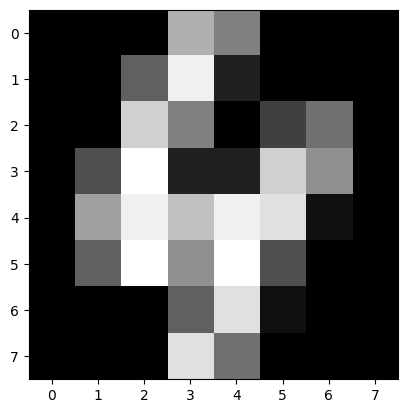

In [2]:
mnist = load_digits()
X,y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(np.argmax(X_train[5]))
plt.imshow(X_train[5].reshape(8,8),cmap='gray')
print(X_train[5])

In [3]:
# Model
# called it fish because why not
class fishNet(torch.nn.Module):
  def __init__(self):
    super(fishNet, self).__init__()
    self.l1 = nn.Linear(64,128) # given 128 neurons, with 64 random weights + 1 bias each
    self.act = nn.ReLU()
    self.l2 = nn.Linear(128,10)

  def forward(self,x):
    x = self.l1(x)
    x = self.act(x)
    x = self.l2(x)
    return x

In [4]:
model = fishNet()
model.forward(torch.tensor(X_train[:10]).float())

tensor([[ 3.7917,  3.1942, -0.8348, -1.9961,  1.0081,  2.8301, -2.1100,  0.0903,
         -0.8790, -0.7444],
        [ 1.4214,  4.0882,  0.3602, -2.3033,  1.5134,  1.5491,  0.8274,  0.3408,
         -0.1784,  0.2421],
        [ 1.2989,  3.8284,  0.1457, -1.9246,  0.2274,  2.7600,  0.0881, -0.3959,
         -0.0087, -2.0487],
        [ 0.9714,  3.0861, -0.5884, -0.3270,  0.0545,  3.4105,  0.9531,  0.7146,
         -2.3115, -0.9671],
        [ 2.3436,  3.4545, -1.0431, -1.7913,  0.7044,  3.1271,  0.0776,  0.6821,
          0.4933, -1.0337],
        [-0.2857,  2.0229,  1.0794, -1.8876,  0.9748,  2.8841,  1.2863,  0.1213,
         -1.8266, -3.0221],
        [ 2.5752,  5.0136, -0.9406, -1.6078,  0.9046,  2.7217, -1.2136,  0.9791,
          0.4645, -0.9149],
        [ 3.6343,  3.4758, -0.8439, -2.3131,  0.6363,  3.3278, -1.7781,  0.2557,
         -0.5965, -1.3000],
        [-0.3550,  2.5905,  0.4521, -1.1721,  0.2738,  2.7237, -0.8291, -1.0314,
         -0.2273,  0.3338],
        [-0.6608,  

In [5]:
# Training

# take 32 example from X_train
BS = 32
loss_function = torch.nn.CrossEntropyLoss()     # cross entropy loss function for n categories
optim = torch.optim.AdamW(model.parameters())   # adamW optimizer, with model's parameters
for i in (t:=trange(10000)):
  sample = np.random.randint(0,X_train.shape[0],size=BS,)  # 32 random ints * number of training examples
  X_batch = X_train[sample]                 # select random training examples
  y_batch = y_train[sample]                             # select those same labels
  y_pred = model.forward(torch.tensor(X_batch).float()) # give 10 probabilities for each of 32 examples / 32x10 tensor
  cat = torch.argmax(y_pred,dim=1)  # squish all cols into 1 col (32x1 tensor), store indices of max value in each column
  accuracy = (cat == torch.tensor(y_batch)).float().mean()
  loss = loss_function(y_pred,torch.tensor(y_batch))      # get loss on 32 current exam
  optim.zero_grad()   # zero all gradients
  loss.backward()     # backprop through loss function
  optim.step()        # learn
  t.set_description("loss %.5f accuracy %0.5f"%(loss,accuracy))
print(f"\ntrue label = {y_batch[0]}, prediction = {cat[0].item()}")     # correct label and [wrong] probabilities for that example

# 1. loss function computes the loss on the small batch
# 2. set the gradient to zero
# 3. take the derivatives of the loss function
# 4. learn by stepping with the optimizer

loss 0.00000 accuracy 1.00000: 100%|████████████████████████████████████████████████| 10000/10000 [00:15<00:00, 643.46it/s]


true label = 8, prediction = 8


In [6]:
# Evaluation

y_preds_final = torch.argmax(model.forward(torch.tensor(X_test).float()) , dim=1).numpy()
eval = (y_preds_final == y_test).mean()
for i in range(100):
  print(f"pred = {y_preds_final[i]} , label = {y_test[i]}")
  if(y_preds_final[i] != y_test[i]):print(i)
print(eval)

pred = 1 , label = 1
pred = 5 , label = 5
pred = 0 , label = 0
pred = 7 , label = 7
pred = 1 , label = 1
pred = 0 , label = 0
pred = 6 , label = 6
pred = 1 , label = 1
pred = 5 , label = 5
pred = 4 , label = 4
pred = 9 , label = 9
pred = 2 , label = 2
pred = 7 , label = 7
pred = 8 , label = 8
pred = 4 , label = 4
pred = 6 , label = 6
pred = 9 , label = 9
pred = 3 , label = 3
pred = 7 , label = 7
pred = 4 , label = 4
pred = 7 , label = 7
pred = 1 , label = 1
pred = 8 , label = 8
pred = 6 , label = 6
pred = 0 , label = 0
pred = 9 , label = 9
pred = 6 , label = 6
pred = 1 , label = 1
pred = 3 , label = 3
pred = 7 , label = 7
pred = 5 , label = 5
pred = 9 , label = 9
pred = 8 , label = 8
pred = 3 , label = 3
pred = 2 , label = 2
pred = 8 , label = 8
pred = 8 , label = 8
pred = 1 , label = 1
pred = 1 , label = 1
pred = 0 , label = 0
pred = 7 , label = 7
pred = 9 , label = 9
pred = 0 , label = 0
pred = 0 , label = 0
pred = 8 , label = 8
pred = 7 , label = 7
pred = 2 , label = 2
pred = 7 , la